In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def get_exp_path(expid):
    expid = str(expid)
    logs_folder = Path(r"C:\Users\Mathiass\Documents\Projects\master-thesis")/"logs"
    matches = Path(logs_folder).rglob(expid) #Get folder in logs_folder that matches expid
    matches_list = list(matches)
    if not len(matches_list) == 1:
        raise ValueError(f"There exists none or more than 1 folder with "
                            f"experiment id {expid} in the {logs_folder.name} "
                            "directory!")
    exp_dir = matches_list[0]
    return exp_dir

In [3]:

expids = [20220919194922, 20220919213409, 20220919200811, 20220908133630, 20220915074003] #small expids
expids += [20220922192602, 20220923123700, 20220924104656, 20220920100736, 20220923074741] #medium expids

In [4]:
get_exp_path(20220924104656).parent.parent.name

'medium'

In [5]:
a = pd.read_csv(get_exp_path(20220924104656)/f"portfolios/long3short1.csv", parse_dates=["date"], index_col="date")["option_ret"]

In [6]:
a.index.name = "test"

In [7]:
a

test
2008-01-31    0.009818
2008-02-29    0.010466
2008-03-31   -0.001804
2008-04-30    0.027676
2008-05-31   -0.012067
                ...   
2021-06-30    0.007169
2021-07-31    0.005231
2021-08-31    0.001633
2021-09-30    0.000568
2021-10-31    0.010533
Name: option_ret, Length: 166, dtype: float64

In [8]:
def load_ls_df(exp_id, which_ls):
    p = get_exp_path(exp_id)
    print(f"Reading exp id {p}...")
    ls_df = pd.read_csv(p/f"portfolios/{which_ls}.csv", parse_dates=["date"], index_col="date")["option_ret"]
    ls_df.index = ls_df.index.rename("Date")
    model = p.parent.name
    model_dict = {"lin": "LR", "rf": "RF", "xgb": "GBT", "nn": "NN", "transformer": "TF"}
    feat_size = p.parent.parent.name
    print(f"Found: {model}, {feat_size}!")
    if feat_size == "medium":
        return ls_df.rename(f"{model_dict[model]}, O+S")
    elif feat_size == "small":
        return ls_df.rename(f"{model_dict[model]}, O")
    else:
        raise ValueError("path.parent.parent.name is whether 'medium' nor 'small'")

In [9]:
def conc_dfs(expids, which_ls):
    dfs = []
    for e in expids:
        dfs.append(load_ls_df(e, which_ls))
    return pd.concat(dfs, axis=1)
    
    

In [10]:
def ret_cum_dfs(expids):
    cum_dfs = {}
    for ls in ["long4short0", "long3short0", "long3short1"]: #define longshort portfolios here.
        print(f"Loading {ls} portfolios...")
        pf_returns = conc_dfs(expids, ls)
        cum_dfs[ls] = (1. + pf_returns).cumprod()  # -1 for true cum. returns. otherwise portfolio value.
        print("Done! ---------------------------------------------------------------------")
    return cum_dfs

---

---

### Run ret_cum_dfs function:

In [11]:
pf_returns_cum_dict = ret_cum_dfs(expids)

Loading long4short0 portfolios...
Reading exp id C:\Users\Mathiass\Documents\Projects\master-thesis\logs\production\small\lin\20220919194922...
Found: lin, small!
Reading exp id C:\Users\Mathiass\Documents\Projects\master-thesis\logs\production\small\rf\20220919213409...
Found: rf, small!
Reading exp id C:\Users\Mathiass\Documents\Projects\master-thesis\logs\production\small\xgb\20220919200811...
Found: xgb, small!
Reading exp id C:\Users\Mathiass\Documents\Projects\master-thesis\logs\production\small\nn\20220908133630...
Found: nn, small!
Reading exp id C:\Users\Mathiass\Documents\Projects\master-thesis\logs\production\small\transformer\20220915074003...
Found: transformer, small!
Reading exp id C:\Users\Mathiass\Documents\Projects\master-thesis\logs\production\medium\lin\20220922192602...
Found: lin, medium!
Reading exp id C:\Users\Mathiass\Documents\Projects\master-thesis\logs\production\medium\rf\20220923123700...
Found: rf, medium!
Reading exp id C:\Users\Mathiass\Documents\Projec

In [12]:
pf_returns_cum_dict["long3short0"]

,"LR, O","RF, O","GBT, O","NN, O","TF, O","LR, O+S","RF, O+S","GBT, O+S","NN, O+S","TF, O+S"
Date,,,,,,,,,,
2008-01-31,-0.022655,-0.035705,0.023385,0.020752,0.020795,0.002371,-0.036585,0.042431,-0.000731,0.013383
2008-02-29,-0.010916,-0.002274,0.031905,0.030344,0.029998,0.010675,-0.009673,0.063419,0.013200,0.024676
2008-03-31,-0.013443,-0.018072,0.047098,0.037044,0.027313,0.003353,-0.023600,0.071376,-0.007955,0.027893
2008-04-30,0.002210,-0.010829,0.078919,0.072361,0.053576,0.013912,-0.035239,0.153208,0.027807,0.063177
2008-05-31,-0.003245,0.017709,0.089868,0.055475,0.055796,0.004685,-0.014083,0.167080,0.022287,0.065949
...,...,...,...,...,...,...,...,...,...,...
2021-06-30,0.586847,-0.218914,3.638808,3.833583,2.778959,2.003031,-0.180809,38.462354,2.166682,10.691777
2021-07-31,0.596656,-0.214978,3.635026,3.830823,2.758935,2.026458,-0.183801,38.369768,2.121616,10.638030
2021-08-31,0.619758,-0.219141,3.638597,3.859886,2.765069,2.060434,-0.182948,38.542224,2.081525,10.678653


In [13]:
pf_returns_cum_dict["long3short1"]

,"LR, O","RF, O","GBT, O","NN, O","TF, O","LR, O+S","RF, O+S","GBT, O+S","NN, O+S","TF, O+S"
Date,,,,,,,,,,
2008-01-31,0.000000,0.000000,0.002053,0.014189,0.010188,0.025168,0.000000,0.009818,0.003078,0.015759
2008-02-29,0.000000,0.000000,0.008326,0.011136,0.013786,0.026746,0.000000,0.020386,0.009411,0.027135
2008-03-31,0.000000,0.000000,0.023193,0.020581,0.015543,0.041416,0.000000,0.018545,0.023095,0.032875
2008-04-30,0.000000,0.000000,0.033550,0.043504,0.032234,0.038354,0.000000,0.046735,0.042359,0.041997
2008-05-31,0.000000,0.000000,0.029419,0.032790,0.030773,0.006619,0.000000,0.034104,0.023158,0.029855
...,...,...,...,...,...,...,...,...,...,...
2021-06-30,0.352801,0.174228,0.876969,0.703600,0.704602,0.042802,0.345233,1.059953,0.752036,1.565432
2021-07-31,0.376335,0.189146,0.888976,0.712967,0.716434,0.059771,0.364284,1.070729,0.759882,1.580406
2021-08-31,0.383217,0.190949,0.891156,0.715541,0.718706,0.061603,0.363374,1.074109,0.762276,1.581938


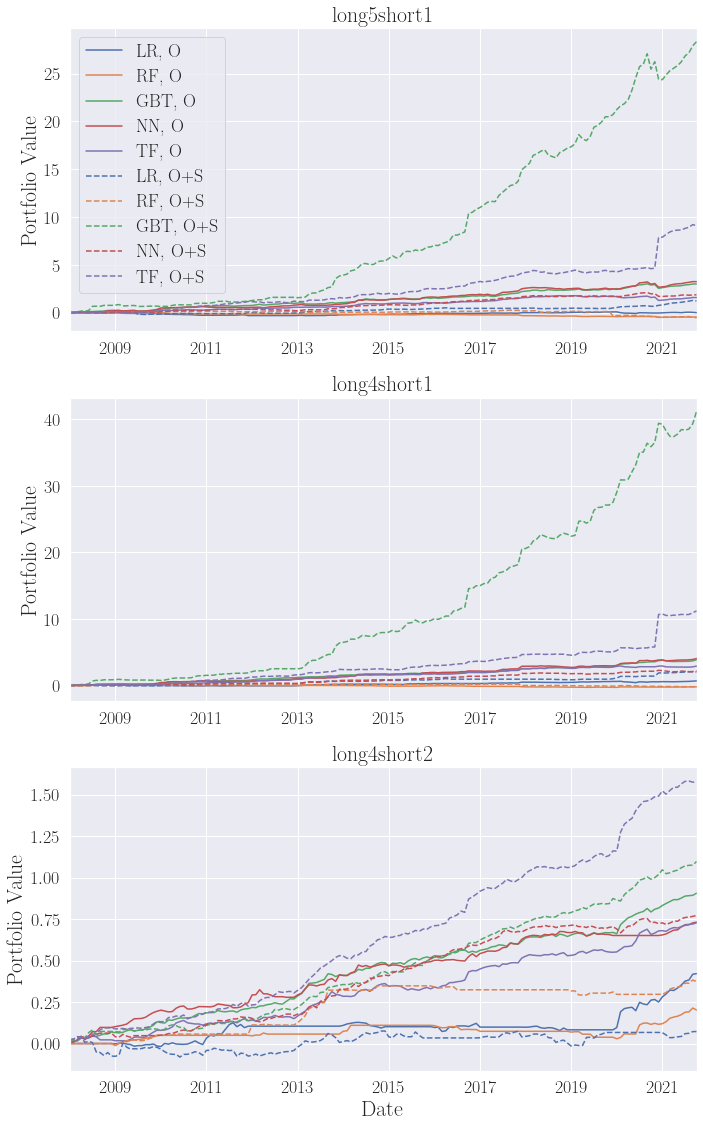

In [23]:
# Plot feature importances
import seaborn as sns
import itertools
sns.set()
# sns.set_style('whitegrid')

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title # for subplots its the figure title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title (for subplots axes controls subtitles)

plt.rcParams.update({
#     "axes.titlesize": 16,
#     "xtick.labelsize": 16,
#     "ytick.labelsize": 16,
    "text.usetex": True,
    "font.family": "Computer Modern",
})
# ------------------
fig, axes = plt.subplots(3, 1, figsize=(10, 16))


linewidth = 1.5
opt_style = "-"
opt_stock_style = "--"

#---------
pf_returns_cum_dict["long4short0"].iloc[:, :5].plot(ylabel="Portfolio Value", linewidth=linewidth,
                title="long5short1", ax=axes[0], style=opt_style, xlabel="")
plt.sca(axes[0]) # set current axis back to axis 0 (somehow goes automatically to axis 1)
plt.gca().set_prop_cycle(None) # reset color cycle
pf_returns_cum_dict["long4short0"].iloc[:, 5:].plot(linewidth=linewidth, ylabel=None,
                title="long5short1", ax=axes[0], style=opt_stock_style, xlabel="")
#---------
plt.sca(axes[1]) # set current axis (needed for reset color cycle)
pf_returns_cum_dict["long3short0"].iloc[:, :5].plot(ylabel="Portfolio Value", linewidth=linewidth,
                title="long4short1", ax=axes[1], style=opt_style, xlabel="", legend=False)
plt.gca().set_prop_cycle(None) # reset color cycle
pf_returns_cum_dict["long3short0"].iloc[:, 5:].plot(linewidth=linewidth, ylabel=None,
                title="long4short1", ax=axes[1], style=opt_stock_style, xlabel="", legend=False)
# axes[0].set_xticklabels([]) #deactivate x-axis tick labels
#---------
plt.sca(axes[2]) # set current axis (needed for reset color cycle)
pf_returns_cum_dict["long3short1"].iloc[:, :5].plot(linewidth=linewidth, ylabel="Portfolio Value",
                title="long4short2", ax=axes[2], legend=False, style=opt_style)
plt.gca().set_prop_cycle(None) # reset color cycle
pf_returns_cum_dict["long3short1"].iloc[:, 5:].plot(linewidth=linewidth, ylabel=None,
                title="long4short2", ax=axes[2], legend=False, style=opt_stock_style)


plt.tight_layout()
# plt.show()
# plt.savefig('Cumulative_return__l5s1_l4s1_l4s2.png', dpi=600)

In [15]:
##TAB:COLOR WITH -- DOESNT WORK??